In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'

In [4]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-034,2000,20.9,0,...,20.2,0,0,0,0.6,0.6,0.06,-0.6,-0.6,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-132,1987,22.0,1,...,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-318,2000,19.2,0,...,18.6,0,0,0,0.6,0.6,0.05,-0.6,-0.6,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-006,1993,20.3,0,...,21.6,0,0,0,1.7,1.7,0.09,-1.7,-1.7,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-301,2000,0.5,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2711,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-005,1999,15.3,0,...,17.5,0,0,0,0.4,0.4,0.07,-0.4,-0.4,Matches
2819,2712,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-135,1997,14.2,4,...,20.0,0,0,0,2.6,2.6,0.08,+1.4,+1.4,Matches
2820,2713,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-052,1998,14.5,4,...,21.0,8,0,0,1.8,1.8,0.08,+2.2,+2.2,Matches
2821,2714,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-261,1990,10.5,2,...,9.4,0,1,1,3.1,2.3,0.14,-1.1,-1.3,Matches


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-034,2000,20.9,718,...,45.3,1,0.9,+0.1,12,36,28,7,72,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-132,1987,22.0,849,...,64.3,0,0.2,-0.2,6,50,4,0,53,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-318,2000,19.2,1152,...,86.4,0,0.8,-0.8,8,49,5,0,45,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-006,1993,20.3,836,...,68.0,1,1.7,-0.7,14,78,13,6,79,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-301,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,2711,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-005,1999,15.3,613,...,71.1,1,0.4,+0.6,8,61,6,1,54,Matches
2819,2712,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-135,1997,14.2,447,...,69.2,1,1.0,0.0,12,34,14,2,46,Matches
2820,2713,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-052,1998,14.5,616,...,64.5,4,3.5,+0.5,36,39,27,1,67,Matches
2821,2714,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-261,1990,10.5,144,...,75.0,0,0.6,-0.6,7,11,0,0,12,Matches


In [6]:
data_shooting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 0 to 2822
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       2715 non-null   object
 1   Player   2715 non-null   object
 2   Nation   2714 non-null   object
 3   Pos      2715 non-null   object
 4   Squad    2715 non-null   object
 5   Comp     2715 non-null   object
 6   Age      2714 non-null   object
 7   Born     2714 non-null   object
 8   90s      2715 non-null   object
 9   Gls      2715 non-null   object
 10  Sh       2715 non-null   object
 11  SoT      2715 non-null   object
 12  SoT%     2137 non-null   object
 13  Sh/90    2715 non-null   object
 14  SoT/90   2715 non-null   object
 15  G/Sh     2137 non-null   object
 16  G/SoT    1702 non-null   object
 17  Dist     2137 non-null   object
 18  FK       2715 non-null   object
 19  PK       2715 non-null   object
 20  PKatt    2715 non-null   object
 21  xG       2715 non-null   object
 22  

In [7]:
d = data_shooting[['Player', '90s', 'Gls', 'Sh', 'SoT', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']]

In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
player_data = pd.merge(player_position, d, on="Player")
player_data.drop_duplicates(inplace=True)
player_data.iloc[:, 3:] = player_data.iloc[:, 3:].astype(float)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

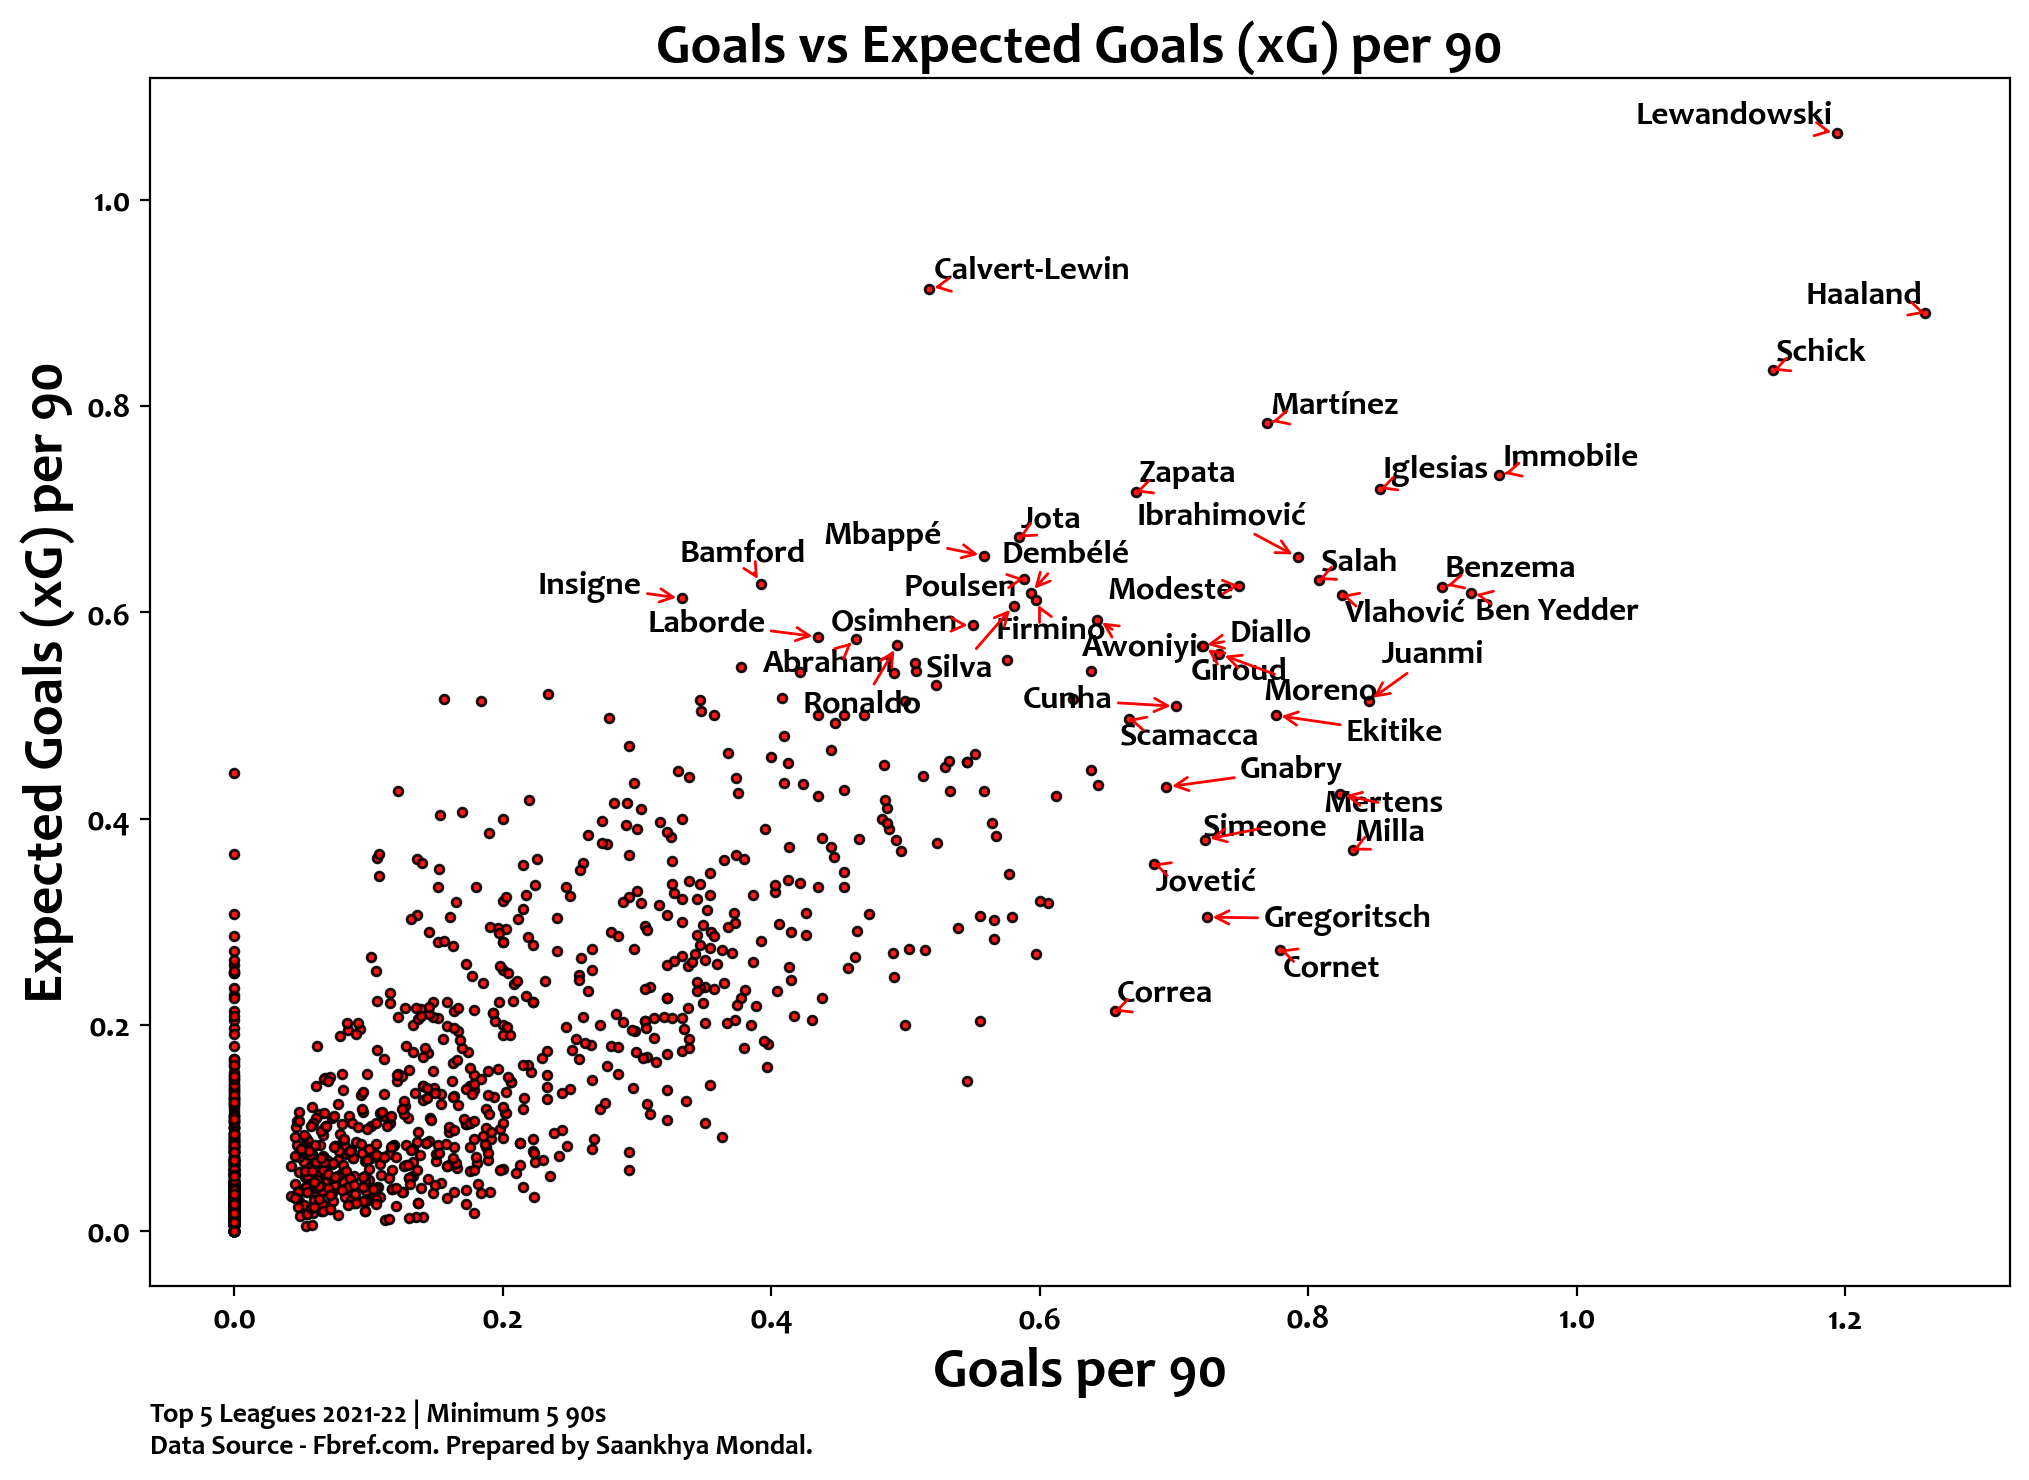

In [10]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Glsp90'] = data['Gls']/data['90s']
data['xGp90'] = data['xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xGp90'].quantile(0.980)
outlier_bottom = data['xGp90'].quantile(0.03)
outlier_right = data['Glsp90'].quantile(0.980)
outlier_left = data['Glsp90'].quantile(0.03)

par_x = list(data['Glsp90'].astype(float))
par_y = list(data['xGp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) per 90', fontsize=20)
ax.set_title('Goals vs Expected Goals (xG) per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/GvsxGp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

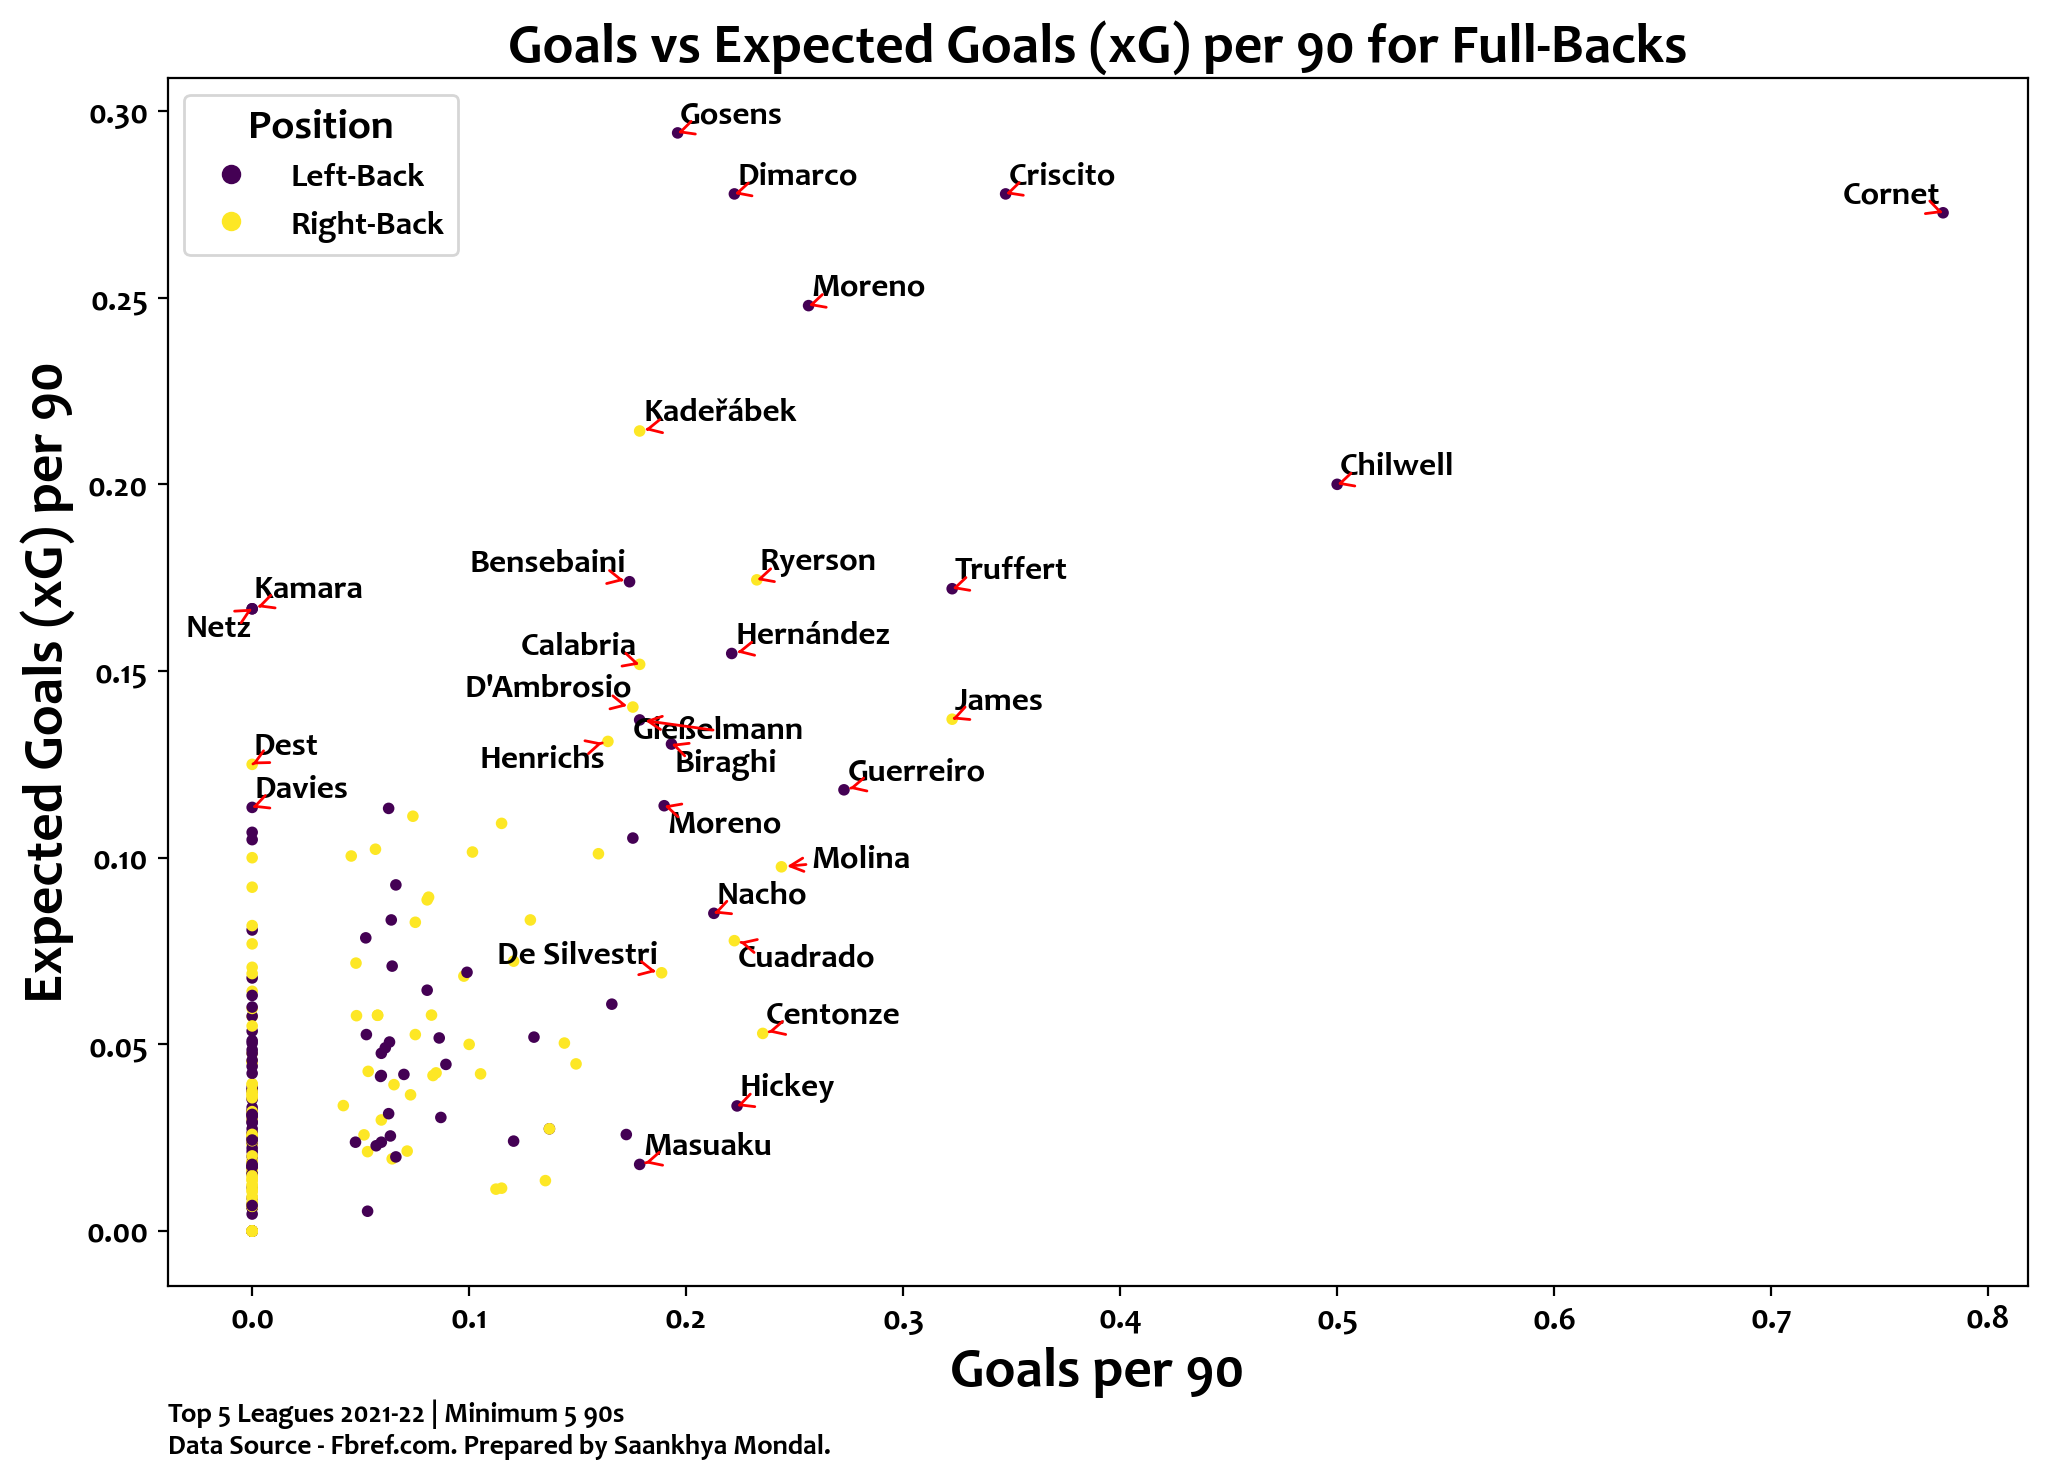

In [12]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Glsp90'] = data['Gls']/data['90s']
data['xGp90'] = data['xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xGp90'].quantile(0.900)
outlier_bottom = data['xGp90'].quantile(0.03)
outlier_right = data['Glsp90'].quantile(0.900)
outlier_left = data['Glsp90'].quantile(0.03)

par_x = list(data['Glsp90'].astype(float))
par_y = list(data['xGp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) per 90', fontsize=20)
ax.set_title('Goals vs Expected Goals (xG) per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [13]:
fig.savefig('Images/GvsxGp90_FB.png', dpi=400, bbox_inches='tight')